Requires py3 and new saga

# Imports/Setup 

In [1]:
import os
import sys
import urllib

import numpy as np

from astropy import units as u
from astropy import table
from astropy.coordinates import SkyCoord

import tqdm

In [2]:
%matplotlib inline
from matplotlib import style, pyplot as plt

The below cells build the saga repo and sets the path to look for it

In [3]:
working_dir = os.path.abspath('..')

In [4]:
%cd ../../saga
sagadir = !pwd
sagadir = sagadir[0]
!python setup.py build
%cd $working_dir

/Users/erik/projects/saga/saga
running build
running build_py
/Users/erik/projects/saga/erik


In [5]:
sagalibdir = os.path.join(sagadir, 'build/lib')
print('Adding', sagalibdir, 'to the python path')
sys.path.insert(0, sagalibdir)

import SAGA as saga

Adding /Users/erik/projects/saga/saga/build/lib to the python path


In [6]:
import decals
import mmtbino

# Get Scooby Doo Builtins

In [7]:
db = saga.Database(os.path.join(os.environ['HOME'],'Dropbox/SAGA/'))
hostcat = saga.HostCatalog(db)
objcat = saga.ObjectCatalog(db)

In [8]:
scoobydoo = hostcat.load_single('ScoobyDoo')
scoobydoo

NSAID,RA,Dec,PGC#,vhelio,distance,r,i,z,I,K,K_err,flag,K_abs,r_abs,b,dist_to_group,brightest_K_nearby,SDSS_FRACGOOD,RA_sub,Dec_sub,othername,vhelio_sub,vhelio_err,distance_sub,dist_2MASS_NSA,u,u_err,A_u,M_u,g,g_err,A_g,M_g,r_sub,r_err,A_r,M_r,i_sub,i_err,A_i,M_i,z_sub,z_err,A_z,M_z,J,J_err,A_J,M_J,H,H_err,A_H,M_H,K_sub,K_err_sub,A_K,M_K,stellar_mass,sersic_n,MK_compiled,SAGA_name,coord
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"deg,deg"
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str16,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str11,object
161174,182.792,20.1757,38802,2448.24,36.3129,12.9512,12.6154,12.3487,11.95,9.734,0.029,0,-23.0663,-19.8491,78.4598,6.0357,12.477,0.982772,182.792,20.1757,12111016+2010324,2448.24,-1,36.3129,0.378163,14.4094,0.00555798,0.137124,-18.5503,12.9839,0.000860291,0.106846,-19.939,12.2563,0.000770509,0.0739157,-20.6268,11.8795,0.00090899,0.0549273,-20.9834,11.5798,0.00181046,0.0408558,-21.2674,10.686,0.019,0.0229349,-22.1351,10.026,0.026,0.0145243,-22.7894,9.745,0.027,0.00976916,-23.0486,10100000000.0,1.73943,-23.0663,ScoobyDoo,"182.792,20.1757"


In [9]:
basecatalog = objcat.load('scoobydoo')[0]
basecatalog

OBJID,RA,DEC,PHOTPTYPE,PHOT_SG,FLAGS,clean,SATURATED,BAD_COUNTS_ERROR,BINNED1,TOO_FEW_GOOD_DETECTIONS,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,MODELMAGERR_U,MODELMAGERR_G,MODELMAGERR_R,MODELMAGERR_I,MODELMAGERR_Z,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,DERED_U,DERED_G,DERED_R,DERED_I,DERED_Z,PETRORAD_U,PETRORAD_G,PETRORAD_R,PETRORAD_I,PETRORAD_Z,PETRORADERR_U,PETRORADERR_G,PETRORADERR_R,PETRORADERR_I,PETRORADERR_Z,DEVRAD_U,DEVRADERR_U,DEVRAD_G,DEVRADERR_G,DEVRAD_R,DEVRADERR_R,DEVRAD_I,DEVRADERR_I,DEVRAD_Z,DEVRADERR_Z,DEVAB_U,DEVAB_G,DEVAB_R,DEVAB_I,DEVAB_Z,CMODELMAG_U,CMODELMAGERR_U,CMODELMAG_G,CMODELMAGERR_G,CMODELMAG_R,CMODELMAGERR_R,CMODELMAG_I,CMODELMAGERR_I,CMODELMAG_Z,CMODELMAGERR_Z,PSFMAG_U,PSFMAGERR_U,PSFMAG_G,PSFMAGERR_G,PSFMAG_R,PSFMAGERR_R,PSFMAG_I,PSFMAGERR_I,PSFMAG_Z,PSFMAGERR_Z,FIBERMAG_U,FIBERMAGERR_U,FIBERMAG_G,FIBERMAGERR_G,FIBERMAG_R,FIBERMAGERR_R,FIBERMAG_I,FIBERMAGERR_I,FIBERMAG_Z,FIBERMAGERR_Z,FRACDEV_U,FRACDEV_G,FRACDEV_R,FRACDEV_I,FRACDEV_Z,Q_U,U_U,Q_G,U_G,Q_R,U_R,Q_I,U_I,Q_Z,U_Z,EXPAB_U,EXPRAD_U,EXPPHI_U,EXPAB_G,EXPRAD_G,EXPPHI_G,EXPAB_R,EXPRAD_R,EXPPHI_R,EXPAB_I,EXPRAD_I,EXPPHI_I,EXPAB_Z,EXPRAD_Z,EXPPHI_Z,FIBER2MAG_R,FIBER2MAGERR_R,EXPMAG_R,EXPMAGERR_R,PETROR50_R,PETROR90_R,PETROMAG_R,SB_EXP_R,SB_PETRO_R,J,JERR,H,HERR,K,KERR,survey,SPEC_Z,SPEC_Z_ERR,SPEC_Z_WARN,PHOTOZ,PHOTOZ_ERR,W1,W1ERR,W2,W2ERR,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_MR,HOST_MG,HOST_NSAID,HOST_SAGA_NAME,HOST_NGC_NAME,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SATS,PROBABILITY_CLASS1,RESCALED_PROBABILITY_CLASS1,REMOVE,TELNAME,MASKNAME,ZQUALITY,SPEC_CLASS,SPECOBJID,SPEC_REPEAT,SPEC_SN,SPEC_HA_EW,SPEC_HA_EWERR,u_mag,g_mag,r_mag,i_mag,z_mag,ug,ug_err,gr,gr_err,ri,ri_err,iz,iz_err,coord
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"deg,deg"
int64,float64,float64,int16,str40,int64,int32,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,str32,float32,float32,int32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str48,str48,float64,float64,int64,int64,float64,float64,int64,str6,str48,int64,str2,str48,str48,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,object
1237668298203201559,182.792360066,20.1756649725,3,GALAXY,1161153266978832,1,0,0,268435456,0,14.4094,12.9839,12.2563,11.8795,11.5798,0.00555798,0.000860291,0.000770509,0.00090899,0.00181046,0.00647745,0.00178272,0.00162387,0.00161787,0.00225035,0.166261,0.122333,0.0887263,0.0672785,0.0477013,14.3979,12.9198,12.1148,11.7508,11.4743,24.1227,27.8057,31.0638,31.1726,27.8346,0.700152,0.582338,0.711667,0.848577,0.74567,29.6754,0.432711,29.6697,0.223488,29.6725,0.235934,27.5823,0.15488,27.573,0.233525,0.964339,0.669669,0.708101,0.714967,0.727419,14.7634,0.00605514,13.1691,0.00178303,12.3024,0.0016535,11.9436,0.00164623,11.6509,0.00228909,1

# Get Scooby Doo from DECaLS 

In [10]:
decals_path = os.path.join(os.environ['HOME'], 'astrodata', 'decals', 'dr5')

bricks_fn = os.path.join(decals_path, 'survey-bricks.fits.gz')
bricks_dr_fn = os.path.join(decals_path, 'survey-bricks-dr5.fits.gz')

bricks = table.Table.read(bricks_fn)
bricks_dr = table.Table.read(bricks_dr_fn)

In [11]:
from importlib import reload
reload(decals)

<module 'decals' from '/Users/erik/projects/saga/erik/decals.py'>

In [12]:
bricks_needed = decals.find_host_bricks(table.Table(scoobydoo), bricks_dr, bricks, environfactor=300*u.kpc)
bricks_needed

brickname,RA1,RA2,DEC1,DEC2,ra,dec,nexp_g,nexp_r,nexp_z,nexphist_g [6],nexphist_r [6],nexphist_z [6],nobjs,npsf,nsimp,nrex,nexp,ndev,ncomp,psfsize_g,psfsize_r,psfsize_z,psfdepth_g,psfdepth_r,psfdepth_z,galdepth_g,galdepth_r,galdepth_z,ebv,trans_g,trans_r,trans_z,ext_g,ext_r,ext_z,wise_nobs [4],trans_wise [4],ext_w1,ext_w2,ext_w3,ext_w4,closest_host_idx,closest_host_name
str32,float64,float64,float64,float64,float64,float64,int16,int16,int16,int32,int32,int32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,int64,str21
1822p200,182.123893805,182.389380531,19.875,20.125,182.256637168,20.0,2,2,3,74055 .. 0,220277 .. 0,3432 .. 720132,3618,1625,0,1550,357,72,14,1.2735,1.12723,1.41585,24.3534,23.9419,23.1587,24.0621,23.5724,22.8713,0.038703,0.891751,0.925728,0.95775,0.124391,0.083792,0.0468694,78 .. 14,0.993462 .. 0.999676,0.00712137,0.00437343,0.000932684,0.000352236,0,ScoobyDoo
1822p202,182.127031019,182.392909897,20.125,20.375,182.259970458,20.25,2,1,3,92738 .. 0,871495 .. 0,8256 .. 0,3851,1658,0,1678,391,104,20,1.10123,0.934669,1.47498,24.5655,23.7695,23.0954,24.214,23.3321,22.8191,0.0335449,0.905471,0.935298,0.963276,0.107813,0.0726248,0.0406229,78 .. 12,0.994331 .. 0.999719,0.00617229,0.00379056,0.000808461,0.000305239,0,ScoobyDoo
1822p205,182.133333333,182.4,20.375,20.625,182.266666667,20.5,1,1,3,870598 .. 0,2052735 .. 0,2216 .. 0,3362,1354,0,1519,363,112,14,1.09793,0.937531,1.48331,24.3191,23.7768,23.0743,23.9466,23.3439,22.8034,0.029409,0.916625,0.943044,0.96773,0.0945206,0.0636706,0.0356143,78 .. 14,0.995028 .. 0.999754,0.00541127,0.00332321,0.00070873,0.000267629,0,ScoobyDoo
1825p197,182.385861561,182.65095729,19.625,19.875,182.518409426,19.75,2,2,3,90464 .. 0,89310 .. 0,2091 .. 0,3625,1590,0,1544,390,89,12,1.29125,1.15001,1.25176,24.3496,23.9371,23.0481,24.0649,23.5884,22.7343,0.0494611,0.863799,0.90608,0.946327,0.158968,0.107083,0.0598974,78 .. 14,0.991653 .. 0.999586,0.00910084,0.0055891,0.00119199,0.000450121,0,ScoobyDoo
1825p200,182.389380531,182.654867257,19.875,20.125,182.522123894,20.0,3,2,4,2069 .. 0,47944 .. 0,4300 .. 1209244,4252,2007,0,1685,447,94,19,1.21597,1.1067,1.46343,24.639,23.9595,23.2004,24.3385,23.5972,22.9258,0.036126,0.898579,0.930497,0.960507,0.116109,0.0782128,0.0437486,78 .. 13,0.993896 .. 0.999697,0.00664718,0.00408225,0.000870635,0.000328737,0,ScoobyDoo
1825p202,182.392909897,182.658788774,20.125,20.375,182.525849335,20.25,3,2,3,14302 .. 0,145877 .. 0,6468 .. 318542,4007,1813,0,1697,386,99,12,1.20255,1.10638,1.43073,24.6309,23.9327,23.122,24.3279,23.5609,22.8449,0.03115,0.911913,0.939775,0.965853,0.100116,0.0674397,0.0377226,78 .. 14,0.994735 .. 0.999739,0.00573163,0.00351998,0.000750694,0.000283488,0,ScoobyDoo
1825p205,182.4,182.666666667,20.375,20.625,182.533333333,20.5,2,1,3,83620 .. 0,1404436 .. 0,710 .. 0,3745,1672,0,1603,350,100,20,1.09945,0.943159,1.48052,24.5884,23.7864,23.0866,24.2319,23.3442,22.8155,0.0291895,0.917221,0.943457,0.967967,0.093815,0.0631953,0.0353485,79 .. 14,0.995065 .. 0.999755,0.00537088,0.00329841,0.000703485,0.000265623,0,ScoobyDoo
1825p207,182.403560831,182.670623145,20.625,20.875,182.537091988,20.75,2,1,3,147222 .. 0,1451826 .. 0,1420 .. 0,3337,1386,0,1492,333,113,13,1.10418,0.948005,1.50742,24.4785,23.6658,23.0562,24.1234,23.256,22.8011,0.0271711,0.922718,0.947261,0.970149,0.0873279,0.0588254,0.0329042,77 .. 12,0.995406 .. 0.999772,0.00499946,0.00307034,0.000654854,0.000247239,0,ScoobyDoo
1827p197,182.65095729,182.916053019,19.625,19.875,182.783505155,19.75,2,2,3,14851 .. 0,12832 .. 0,974 .. 219441,4071,1742,0,1689,488,131,21,1.28426,1.14498,1.24175,24.3547,23.9475,23.0997,24.0658,23.594,22.772,0.0412583,0.885031,0.921023,0.955024,0.132604,0.0893242,0.0499638,78 .. 14,0.993032 .. 0.999654,0.00759152,0.00466216,0.000994347,0.000375476,0,ScoobyDoo


In [13]:
decals.download_bricks(bricks_needed, 5);

decals_dr5/catalogs/tractor-1822p200.fits already exists, skipping...
decals_dr5/catalogs/tractor-1822p202.fits already exists, skipping...
decals_dr5/catalogs/tractor-1822p205.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p197.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p200.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p202.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p205.fits already exists, skipping...
decals_dr5/catalogs/tractor-1825p207.fits already exists, skipping...
decals_dr5/catalogs/tractor-1827p197.fits already exists, skipping...
decals_dr5/catalogs/tractor-1827p200.fits already exists, skipping...
decals_dr5/catalogs/tractor-1827p202.fits already exists, skipping...
decals_dr5/catalogs/tractor-1828p205.fits already exists, skipping...
decals_dr5/catalogs/tractor-1828p207.fits already exists, skipping...
decals_dr5/catalogs/tractor-1830p197.fits already exists, skipping...
decals_dr5/catalogs/

In [14]:
brick_cats = []
for row in tqdm.tqdm_notebook(bricks_needed):
    cat = table.Table.read(row['local_fn'])
    brick_cats.append(cat)

In [15]:
bricks_cat = table.vstack(brick_cats)
reload(decals)
decals.mags_catalog(bricks_cat, extcorr=True)

bricks_cat['coord'] = SkyCoord(bricks_cat['ra'], bricks_cat['dec'])
bricks_cat['hostsep'] = bricks_cat['coord'].separation(scoobydoo['coord'])
bricks_cat['hostsep_phys'] = (bricks_cat['hostsep']*scoobydoo['distance']*u.Mpc).to(u.kpc, u.dimensionless_angles())
decals.mags_catalog(bricks_cat)

bricks_cat

/Users/erik/projects/saga/erik/decals.py:102: RuntimeWarning: divide by zero encountered in log10
  mag = np.array(22.5 - 2.5*np.log10(flux))
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy-3.0.dev19816-py3.6-macosx-10.7-x86_64.egg/astropy/units/quantity.py:1105: RuntimeWarning: divide by zero encountered in power
  return super(Quantity, self).__pow__(other)
/Users/erik/projects/saga/erik/decals.py:102: RuntimeWarning: invalid value encountered in log10
  mag = np.array(22.5 - 2.5*np.log10(flux))
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy-3.0.dev19816-py3.6-macosx-10.7-x86_64.egg/astropy/units/quantity.py:1059: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


release,brickid,brickname,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,flux_u,flux_g,flux_r,flux_i,flux_z,flux_Y,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_u,flux_ivar_g,flux_ivar_r,flux_ivar_i,flux_ivar_z,flux_ivar_Y,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,apflux_u [8],apflux_g [8],apflux_r [8],apflux_i [8],apflux_z [8],apflux_Y [8],apflux_resid_u [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_i [8],apflux_resid_z [8],apflux_resid_Y [8],apflux_ivar_u [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_i [8],apflux_ivar_z [8],apflux_ivar_Y [8],mw_transmission_u,mw_transmission_g,mw_transmission_r,mw_transmission_i,mw_transmission_z,mw_transmission_Y,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_u,nobs_g,nobs_r,nobs_i,nobs_z,nobs_Y,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_u,rchisq_g,rchisq_r,rchisq_i,rchisq_z,rchisq_Y,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_u,fracflux_g,fracflux_r,fracflux_i,fracflux_z,fracflux_Y,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_u,fracmasked_g,fracmasked_r,fracmasked_i,fracmasked_z,fracmasked_Y,fracin_u,fracin_g,fracin_r,fracin_i,fracin_z,fracin_Y,anymask_u,anymask_g,anymask_r,anymask_i,anymask_z,anymask_Y,allmask_u,allmask_g,allmask_r,allmask_i,allmask_z,allmask_Y,wisemask_w1,wisemask_w2,psfsize_u,psfsize_g,psfsize_r,psfsize_i,psfsize_z,psfsize_Y,psfdepth_u,psfdepth_g,psfdepth_r,psfdepth_i,psfdepth_z,psfdepth_Y,galdepth_u,galdepth_g,galdepth_r,galdepth_i,galdepth_z,galdepth_Y,wise_coadd_id,lc_flux_w1 [7],lc_flux_w2 [7],lc_flux_ivar_w1 [7],lc_flux_ivar_w2 [7],lc_nobs_w1 [7],lc_nobs_w2 [7],lc_fracflux_w1 [7],lc_fracflux_w2 [7],lc_rchisq_w1 [7],lc_rchisq_w2 [7],lc_mjd_w1 [7],lc_mjd_w2 [7],fracdev,fracdev_ivar,shapeexp_r,shapeexp_r_ivar,shapeexp_e1,shapeexp_e1_ivar,shapeexp_e2,shapeexp_e2_ivar,shapedev_r,shapedev_r_ivar,shapedev_e1,shapedev_e1_ivar,shapedev_e2,shapedev_e2_ivar,mag_u,mag_err_u,mag_g,mag_err_g,mag_r,mag_err_r,mag_i,mag_err_i,mag_z,mag_err_z,mag_Y,mag_err_Y,coord,hostsep,hostsep_phys
,,,,,,deg,deg,1/deg^2,1/deg^2,,,,mag,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,arcsec,1/arcsec^2,,,,,arcsec,1/arcsec^2,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,"deg,deg",deg,kpc
int16,int32,str32,int32,bool,str16,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float

## Select objects

### Targets 

want to use gri cuts and r<23

In [16]:
from SAGA.objects import cuts

In [17]:
target_cat = bricks_cat.copy()
for color in ['u-g', 'g-r', 'r-i']:
    c1, c2 = color.split('-')
    target_cat[c1+c2] = target_cat['mag_'+c1] - target_cat['mag_'+c2]
    target_cat[c1+c2+'_err'] = np.hypot(target_cat['mag_err_'+c1], target_cat['mag_err_'+c2])
len(target_cat)

-c:4: RuntimeWarning: invalid value encountered in subtract


80766

In [18]:
# eliminate_stars
starmsk = target_cat['type'] == 'PSF '
target_cat = target_cat[~starmsk]
len(target_cat)

44566

In [19]:
for band in 'ugrizY':
    print(band)
    print('frac with any data:', np.sum(target_cat['galdepth_'+band]>0)/len(target_cat))
    print('frac deeper than 23:', np.sum(target_cat['galdepth_'+band]>23)/len(target_cat))
    print('')

u
frac with any data: 0.0
frac deeper than 23: 0.0

g
frac with any data: 0.987479244267
frac deeper than 23: 0.987479244267

r
frac with any data: 0.963133330342
frac deeper than 23: 0.963133330342

i
frac with any data: 0.0
frac deeper than 23: 0.0

z
frac with any data: 0.995175694476
frac deeper than 23: 0.981757393529

Y
frac with any data: 0.0
frac deeper than 23: 0.0



So... we cannot use gri cuts.  For now lets just go with gr cuts

In [20]:
target_cat = cuts.gr_cut.filter(target_cat)
len(target_cat)

33676

mag cut.  We do r<23 in *apparent* rather than extcorr mag, as this is a spectrograph experiment

/Users/erik/projects/saga/erik/decals.py:102: RuntimeWarning: divide by zero encountered in log10
  mag = np.array(22.5 - 2.5*np.log10(flux))
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy-3.0.dev19816-py3.6-macosx-10.7-x86_64.egg/astropy/units/quantity.py:1105: RuntimeWarning: divide by zero encountered in power
  return super(Quantity, self).__pow__(other)
/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/astropy-3.0.dev19816-py3.6-macosx-10.7-x86_64.egg/astropy/units/quantity.py:1059: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__truediv__(other)


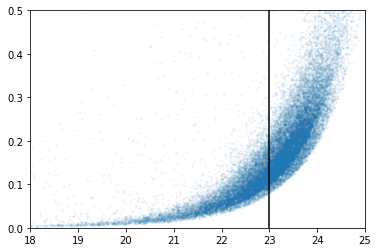

In [21]:
r, rerr = decals.fluxivar_to_mag_magerr(target_cat['flux_r'], target_cat['flux_ivar_r'])
plt.scatter(r, rerr, alpha=.05, s=2)
plt.ylim(0, .5)
plt.xlim(18,25)
plt.axvline(23, c='k')

Looks like the uncertainty around 23 is ~0.1, so not too unreasonable

In [22]:
target_cat = target_cat[r<23*u.mag]
len(target_cat)

13313

Now take only those inside 300 kpc

In [23]:
target_cat = target_cat[u.Quantity(target_cat['hostsep_phys']) < 300*u.kpc]
len(target_cat)

7123

In [24]:
# add columns that `write_bino_input` understands
target_cat['name'] = np.char.add(target_cat['brickname'],np.char.add('-', target_cat['objid'].astype('U')))
target_cat['magnitude'] = target_cat['mag_r']
target_cat['type'] = ['target']*len(target_cat)

### Now some random eye-ball checks

In [25]:
decals.show_decals_objects_in_nb(target_cat, dr=5, subsample=24, info_cols=['mag_r'])
                                 #info_cols=['mag_r', 'anymask_g', 'anymask_r'])

1827p200-3932mag_r = 21.21500015258789,1830p205-1276mag_r = 22.6129093170166,1825p200-289mag_r = 22.05517578125
1827p200-2022mag_r = 22.87520408630371,1828p205-1349mag_r = 22.507402420043945,1827p200-2809mag_r = 22.32868003845215
1830p200-1172mag_r = 22.805011749267578,1830p200-1416mag_r = 22.478984832763672,1830p205-1732mag_r = 22.395143508911133
1827p202-1895mag_r = 22.53449821472168,1825p197-3232mag_r = 22.94045639038086,1825p197-3525mag_r = 22.92039680480957
1833p202-1084mag_r = 22.864479064941406,1830p197-2197mag_r = 20.03453254699707,1830p205-2541mag_r = 21.899871826171875
1827p202-2203mag_r = 18.44794273376465,1830p200-2188mag_r = 22.420276641845703,1827p202-3292mag_r = 22.51311683654785
1827p200-3841mag_r = 20.91866111755371,1827p202-1388mag_r = 21.1788387298584,1830p200-316mag_r = 22.613264083862305
1833p200-1931mag_r = 22.915695190429688,1830p205-2516mag_r = 16.922061920166016,1830p200-1827mag_r = 22.692825317382812


## Now make specphot stars

In [26]:
flux = mmtbino.select_flux_stars(basecatalog, cattype='base')

In [27]:
decals.show_decals_objects_in_nb(flux, dr=5)

flux1,flux2,flux3
flux4,flux5,flux6
flux7,flux8,flux9
flux10,flux11,flux12
flux13,flux14,flux15
flux16,flux17,flux18
flux19,flux20,flux21
flux22,flux23,flux24
flux25,flux26,flux27
flux28,flux29,flux30
flux31,flux32,flux33


They look like perfectly reasonable flux stars to me...

## Write catalog 

In [28]:
mmtbino.write_bino_input([target_cat, flux], 'mmtbino/Feb2018_binocat.csv', overwrite=True)

name,ra,dec,magnitude,type
,,,mag,
str176,float64,float64,float32,int64
1822p200-304,182.385249055,19.9009359453,21.7441,1
1822p200-383,182.385985604,19.9069395892,22.7112,1
1822p200-479,182.377574928,19.9151072748,22.8692,1
1822p200-507,182.376671954,19.9177409335,22.5298,1
1822p200-538,182.389410393,19.9220603166,21.7355,1
1822p200-541,182.389249026,19.9206694338,22.9624,1
1822p200-567,182.367971343,19.9220032668,22.8726,1
1822p200-590,182.379013339,19.9237897121,22.5152,1
